# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)

dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000), "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

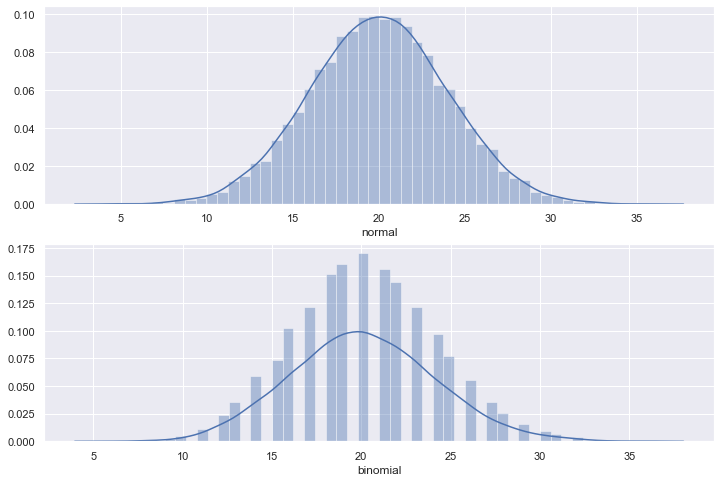

In [4]:
fig, axis = plt.subplots(2,1)
sns.distplot(dataframe.normal, ax=axis[0])
sns.distplot(dataframe.binomial, ax=axis[1])

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [5]:
def q1():
    
    quartis_norm = dataframe.normal.quantile([0.25, 0.5, 0.75])
    quartis_bino = dataframe.binomial.quantile([0.25, 0.5, 0.75])
    return tuple(round(quartis_norm - quartis_bino,3))

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [6]:
def q2():
    # Cria o objeto com a CDF para a distribuição normal
    ecdf = ECDF(dataframe.normal)
    # Calcula a probabilidade acumulada para mean-std
    p_inf = ecdf(dataframe.normal.mean()-dataframe.normal.std())
    # Calcula a probabilidade acumulada para mean+std
    p_sup = ecdf(dataframe.normal.mean()+dataframe.normal.std())
    # Retorna a probabilidade no intervalo
    return (float(round(p_sup-p_inf, 3)))

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [7]:
def q3():
    m_binom = df.binomial.mean()
    v_binom = df.binomial.std()**2
    m_norm = df.normal.mean()
    v_norm = df.normal.std()**2
    return ((round(m_binom-m_norm, 3), round(v_binom-v_norm, 3)))

## Parte 2

### _Setup_ da parte 2

In [3]:
stars = pd.read_csv("HTRU_2.csv")
stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [4]:
stars.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [20]:
def q4():
    false_pulsar_mean_profile_standardized = stars[stars['target']==0]['mean_profile']
    fs_mean = false_pulsar_mean_profile_standardized.mean()
    fs_std = false_pulsar_mean_profile_standardized.std()
    false_pulsar_mean_profile_standardized = (false_pulsar_mean_profile_standardized-fs_mean)/fs_std

    q_80 = sct.norm.ppf(0.8)
    q_90 = sct.norm.ppf(0.9)
    q_95 = sct.norm.ppf(0.95)

    ecdf = ECDF(false_pulsar_mean_profile_standardized)

    return ((round(ecdf(q_80), 3), round(ecdf(q_90), 3), round(ecdf(q_95), 3)))

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [22]:
def q5():
    false_pulsar_mean_profile_standardized = stars[stars['target']==0]['mean_profile']
    fs_mean = false_pulsar_mean_profile_standardized.mean()
    fs_std = false_pulsar_mean_profile_standardized.std()
    false_pulsar_mean_profile_standardized = (false_pulsar_mean_profile_standardized-fs_mean)/fs_std

    q1 = false_pulsar_mean_profile_standardized.quantile(0.25)
    q2 = false_pulsar_mean_profile_standardized.quantile(0.5)
    q3 = false_pulsar_mean_profile_standardized.quantile(0.75)

    q1_teorico = sct.norm.ppf(0.25)
    q2_teorico = sct.norm.ppf(0.50)
    q3_teorico = sct.norm.ppf(0.75)

    diff_q1 = float(round(q1-q1_teorico, 3))
    diff_q2 = float(round(q2-q2_teorico, 3))
    diff_q3 = float(round(q3-q3_teorico, 3))
    return ((diff_q1, diff_q2, diff_q3))